**Programming assignment. Bayes classification**

---

In [1]:
from sklearn import datasets, model_selection, naive_bayes

import numpy as np
import pandas as pd

In this task we will study Naive bayes module in scikit-learn package.

---
# Preprocessing of the data

## Import data

In [2]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [8]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [9]:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
pd.DataFrame(digits.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
pd.DataFrame(breast_cancer.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
bayes_bern_clf = naive_bayes.BernoulliNB()
bayes_multinom_clf = naive_bayes.MultinomialNB()
bayes_gauss_clf = naive_bayes.GaussianNB()

In [21]:
"""Estimating CV scores of every clfer for the both datasets."""

bayes_bern_clf_cvscore_digt = model_selection.cross_val_score(
    bayes_bern_clf, digits.data, digits.target, n_jobs=-1)
bayes_bern_clf_cvscore_bc = model_selection.cross_val_score(
    bayes_bern_clf, breast_cancer.data, breast_cancer.target, n_jobs=-1)

bayes_multinom_clf_cvscore_digt = model_selection.cross_val_score(
    bayes_multinom_clf, digits.data, digits.target, n_jobs=-1)
bayes_multinom_clf_cvscore_bc = model_selection.cross_val_score(
    bayes_multinom_clf, breast_cancer.data, breast_cancer.target, n_jobs=-1)

bayes_gauss_clf_cvscore_digt = model_selection.cross_val_score(
    bayes_gauss_clf, digits.data, digits.target, n_jobs=-1)
bayes_gauss_clf_cvscore_bc = model_selection.cross_val_score(
    bayes_gauss_clf, breast_cancer.data, breast_cancer.target, n_jobs=-1)

In [25]:
print('Cross-validation scores: \n')
print('Digits dataset')
print('--------------')
print('BernoulliNB: {:5f}'.format(bayes_bern_clf_cvscore_digt.mean()))
print('MultinomialNB: {:5f}'.format(bayes_multinom_clf_cvscore_digt.mean()))
print('GaussianNB: {:5f}\n'.format(bayes_gauss_clf_cvscore_digt.mean()))
print('Breast cancer dataset')
print('---------------------')
print('BernoulliNB: {:5f}'.format(bayes_bern_clf_cvscore_bc.mean()))
print('MultinomialNB: {:5f}'.format(bayes_multinom_clf_cvscore_bc.mean()))
print('GaussianNB: {:5f}'.format(bayes_gauss_clf_cvscore_bc.mean()))

Cross-validation scores: 

Digits dataset
--------------
BernoulliNB: 0.825824
MultinomialNB: 0.870877
GaussianNB: 0.818600

Breast cancer dataset
---------------------
BernoulliNB: 0.627420
MultinomialNB: 0.894579
GaussianNB: 0.936749


In [26]:
def write_answer(n, ans):
    filen = 'bayes_ans' + str(n) + '.txt'
    with open(filen, 'w') as fout:
        fout.write(str(ans))

In [27]:
write_answer(1, bayes_gauss_clf_cvscore_bc.mean())

In [28]:
write_answer(2, bayes_multinom_clf_cvscore_digt.mean())

In [29]:
write_answer(3, '3 4')

---
# Experiment with cities

In [75]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [30]:
cities = {
    'SPB': 168650,
    'EKB': 40295,
    'NN': 40117,
    'KNDR': 35255,
    'KZN': 34302,
    'NVSB': 31637,
    'RSTV': 30441,
    'VRNZH': 30327,
    'SMR': 29497,
    'UFA': 28002,
    'CHLB':27961,
    'VLGGRD': 27805,
    'PERM': 27230,
    'KRSNRSK': 24324,
    'OMSK': 23436,
    'RZN': 20860,
    'SRTV': 19992,
    'KIROV': 18833,
    'TULA': 17797,
    'ORNB': 17701,
    'KURSK': 17607,
    'TVER': 17363,
    'BLGRD': 16599,
    'YAR': 15958
}

In [ ]:
df = pd.Series(cities, dtype=float)

df2 = pd.Series(preprocessing.scale(df), index=df.index)

df3 = pd.Series(preprocessing.scale(df, with_mean=False), index=df.index)

df4 = pd.Series(preprocessing.scale(df, with_std=False),index=df.index)

df5 = df / sum(df)

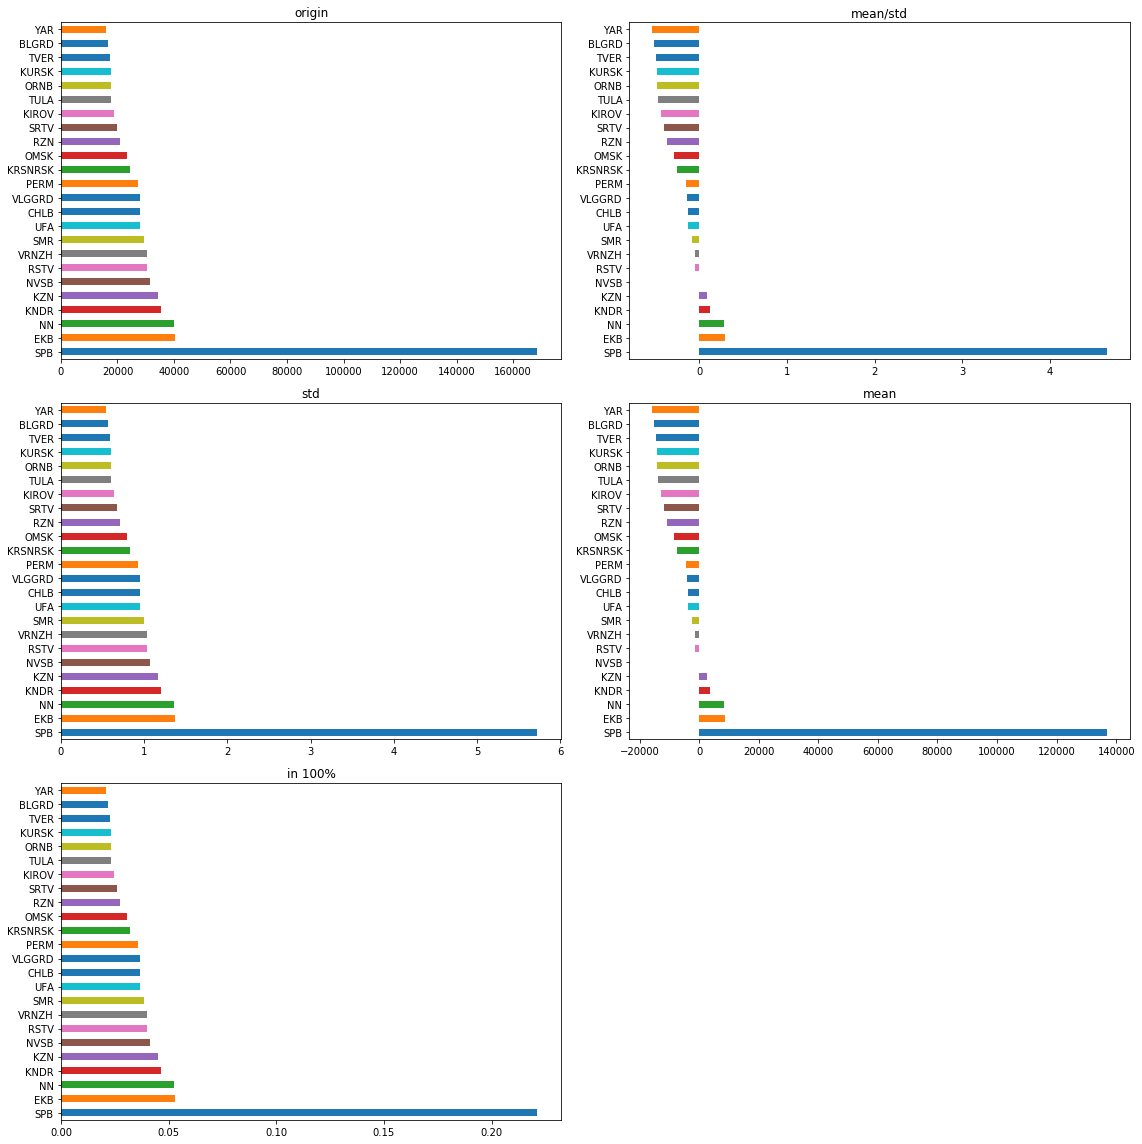

In [87]:
fig = plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
df.plot(kind='barh', title='origin', stacked=True);

plt.subplot(3,2,2)
df2.plot(kind='barh', title='mean/std');

plt.subplot(3,2,3)
df3.plot(kind='barh', title='std');

plt.subplot(3,2,4)
df4.plot(kind='barh', title='mean');

plt.subplot(3,2,5)
df5.plot(kind='barh', stacked=True, title='in 100%');


plt.tight_layout();